In [1]:
!pip install tensorflow
!pip install easyocr
!pip install ultralytics
!pip install opencv-python-headless
!pip install matplotlib

# ✅ Import everything after installation
import tensorflow as tf
import easyocr
import cv2
from ultralytics import YOLO
import numpy as np
from keras.models import load_model
from keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow
from ultralytics import YOLO
import easyocr
import os

from google.colab import drive
drive.mount('/content/drive')

import kagglehub, glob, xml.etree.ElementTree as xet, cv2, numpy as np
from pathlib import Path
from sklearn.model_selection import train_test_split



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 30.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 51.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 25.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

In [ ]:
# ✅ Download dataset from Kaggle
dataset_path = kagglehub.dataset_download("andrewmvd/car-plate-detection")
xml_files_path = glob.glob(f'{dataset_path}/annotations/*.xml')

# ✅ Parse XML annotations into labels dictionary
labels_dict = {'filepath': [], 'xmin': [], 'xmax': [], 'ymin': [], 'ymax': []}
for xml_filename in xml_files_path:
    info = xet.parse(xml_filename)
    root = info.getroot()
    # If there are multiple objects, you can add a loop here.
    bbox = root.find('object').find('bndbox')
    xmin, xmax = int(bbox.find('xmin').text), int(bbox.find('xmax').text)
    ymin, ymax = int(bbox.find('ymin').text), int(bbox.find('ymax').text)
    image_filename = xml_filename.replace('annotations', 'images').replace('.xml', '.png')
    labels_dict['filepath'].append(image_filename)
    labels_dict['xmin'].append(xmin)
    labels_dict['xmax'].append(xmax)
    labels_dict['ymin'].append(ymin)
    labels_dict['ymax'].append(ymax)

print("✅ Dataset downloaded and annotations parsed!")


✅ Dataset downloaded and annotations parsed!


In [ ]:
# ✅ Set output directory on Google Drive for YOLO training results
drive_output_dir = "/content/drive/MyDrive/license_plate_recognition"
os.makedirs(drive_output_dir, exist_ok=True)

yaml_file = f"{drive_output_dir}/license_plate.yaml"
if not os.path.exists(yaml_file):
    raise FileNotFoundError(" Missing YAML file for YOLO training in your Drive folder!")

# ✅ Load & train YOLO model on license plate dataset
yolo_model_instance = YOLO("yolov8n.pt")
yolo_model_instance.train(data=yaml_file, epochs=50, batch=16, imgsz=640, workers=4)
yolo_model_instance.save(f"{drive_output_dir}/license_plate_model.pt")
print("✅ YOLO Model Trained & Saved!")


100%|██████████| 6.25M/6.25M [00:00<00:00, 335MB/s]

Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)


engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/license_plate_recognition/license_plate.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, keras=False, opt

100%|██████████| 755k/755k [00:00<00:00, 84.7MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 353MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.5±0.2 ms, read: 0.2±0.1 MB/s, size: 172.2 KB)


train: Scanning /content/drive/MyDrive/license_plate_recognition/labels/train.cache... 420 images, 0 backgrounds, 0 corrupt: 100%|██████████| 420/420 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.9±0.5 ms, read: 15.1±33.0 MB/s, size: 231.0 KB)


val: Scanning /content/drive/MyDrive/license_plate_recognition/labels/val.cache... 161 images, 0 backgrounds, 0 corrupt: 100%|██████████| 161/161 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.04G      1.509      2.987      1.321          7        640: 100%|██████████| 27/27 [00:12<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        161        161    0.00288      0.863      0.105     0.0606



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.53G      1.487      2.005       1.27          9        640: 100%|██████████| 27/27 [00:10<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.03it/s]

                   all        161        161     0.0259     0.0621     0.0116    0.00526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.54G      1.461      1.846      1.306          8        640: 100%|██████████| 27/27 [00:10<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        161        161     0.0455     0.0621     0.0154    0.00765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      2.56G      1.522       1.75      1.355          5        640: 100%|██████████| 27/27 [00:09<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  2.00it/s]

                   all        161        161     0.0424      0.429     0.0427     0.0209



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.58G      1.531       1.61      1.327          8        640: 100%|██████████| 27/27 [00:08<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.50it/s]

                   all        161        161      0.277      0.491      0.248      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.58G      1.515      1.518      1.315          5        640: 100%|██████████| 27/27 [00:08<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.57it/s]

                   all        161        161      0.573      0.658      0.623      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.58G      1.418      1.323      1.256          5        640: 100%|██████████| 27/27 [00:09<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        161        161      0.575      0.622      0.549      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.58G      1.441      1.294      1.273          4        640: 100%|██████████| 27/27 [00:09<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all        161        161      0.785      0.776      0.864      0.465



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50       2.6G       1.47      1.228      1.272         12        640: 100%|██████████| 27/27 [00:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        161        161      0.784      0.789      0.847      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50       2.6G      1.392      1.138      1.242          9        640: 100%|██████████| 27/27 [00:09<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.99it/s]

                   all        161        161      0.805      0.814      0.886      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.61G      1.414      1.103      1.226          9        640: 100%|██████████| 27/27 [00:08<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.22it/s]

                   all        161        161      0.911      0.894      0.923      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.63G      1.354      1.073      1.226          8        640: 100%|██████████| 27/27 [00:08<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.03it/s]


                   all        161        161      0.778      0.851      0.856      0.484

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.63G      1.406      1.107      1.265          3        640: 100%|██████████| 27/27 [00:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.98it/s]

                   all        161        161      0.863      0.857      0.905      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.63G      1.398      1.026      1.232         10        640: 100%|██████████| 27/27 [00:09<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]

                   all        161        161      0.833       0.87        0.9      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.63G      1.391      1.067      1.232          6        640: 100%|██████████| 27/27 [00:10<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        161        161      0.839      0.839      0.914      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.63G      1.385      1.022      1.265          4        640: 100%|██████████| 27/27 [00:09<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.01it/s]

                   all        161        161      0.825      0.894      0.938      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.65G      1.326     0.9675      1.191          9        640: 100%|██████████| 27/27 [00:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.16it/s]

                   all        161        161      0.877      0.887      0.933      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.65G      1.312     0.8881      1.199          5        640: 100%|██████████| 27/27 [00:09<00:00,  2.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.26it/s]

                   all        161        161      0.838        0.9      0.927      0.573



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.65G       1.38     0.9136      1.209          7        640: 100%|██████████| 27/27 [00:08<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.58it/s]

                   all        161        161      0.928      0.882      0.956      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.66G      1.273     0.9142      1.193          5        640: 100%|██████████| 27/27 [00:08<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.40it/s]

                   all        161        161      0.904      0.913      0.968       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      2.66G      1.338     0.9192      1.205          5        640: 100%|██████████| 27/27 [00:09<00:00,  2.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all        161        161      0.901      0.963      0.976       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.66G      1.204     0.8152      1.149          9        640: 100%|██████████| 27/27 [00:09<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.28it/s]

                   all        161        161      0.895      0.932      0.958      0.594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.66G      1.236     0.8175      1.158          8        640: 100%|██████████| 27/27 [00:09<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.22it/s]

                   all        161        161      0.911      0.919      0.961      0.618



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.66G      1.284     0.8441      1.166          5        640: 100%|██████████| 27/27 [00:09<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.88it/s]

                   all        161        161      0.896      0.906      0.936      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      2.66G      1.222     0.8076      1.137          7        640: 100%|██████████| 27/27 [00:09<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.87it/s]

                   all        161        161      0.904      0.944      0.976      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.66G      1.246     0.7899      1.156          8        640: 100%|██████████| 27/27 [00:08<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.85it/s]

                   all        161        161      0.916      0.952      0.971      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.66G      1.221     0.7929      1.153          9        640: 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.97it/s]

                   all        161        161      0.898      0.969       0.97      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.66G      1.198     0.7623      1.147          5        640: 100%|██████████| 27/27 [00:09<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.85it/s]

                   all        161        161      0.871      0.965      0.965      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.66G      1.183     0.7346      1.143          7        640: 100%|██████████| 27/27 [00:09<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]

                   all        161        161      0.922      0.961      0.975      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.66G      1.186     0.7504      1.138         11        640: 100%|██████████| 27/27 [00:09<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.71it/s]

                   all        161        161      0.921      0.975      0.973      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.66G      1.134     0.7273      1.108          9        640: 100%|██████████| 27/27 [00:09<00:00,  2.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.53it/s]

                   all        161        161      0.919      0.963      0.971      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.66G      1.146     0.7179      1.118         10        640: 100%|██████████| 27/27 [00:11<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.89it/s]

                   all        161        161      0.928      0.963      0.985      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.66G       1.19     0.7197      1.147          6        640: 100%|██████████| 27/27 [00:09<00:00,  2.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.14it/s]

                   all        161        161      0.943      0.969      0.978      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.66G      1.161     0.7055      1.123          5        640: 100%|██████████| 27/27 [00:08<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.19it/s]

                   all        161        161      0.934      0.963       0.98      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.66G       1.16     0.6935      1.121          6        640: 100%|██████████| 27/27 [00:08<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.32it/s]

                   all        161        161      0.923       0.95      0.977      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.66G      1.126     0.6838      1.133         10        640: 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.37it/s]

                   all        161        161      0.934      0.938      0.976      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.66G      1.091      0.673      1.088          6        640: 100%|██████████| 27/27 [00:09<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]

                   all        161        161      0.938      0.963      0.972      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.66G      1.096     0.6358      1.077          6        640: 100%|██████████| 27/27 [00:09<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.21it/s]

                   all        161        161      0.935      0.975      0.985      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.66G      1.123     0.6844      1.096          5        640: 100%|██████████| 27/27 [00:10<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.12it/s]

                   all        161        161      0.935      0.963      0.985      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.66G      1.014     0.6134      1.056          8        640: 100%|██████████| 27/27 [00:09<00:00,  2.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.78it/s]

                   all        161        161       0.94       0.98      0.983      0.693


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.66G      1.052     0.6387       1.08          4        640: 100%|██████████| 27/27 [00:10<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.60it/s]

                   all        161        161      0.938      0.938      0.983      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.66G      1.074     0.6263       1.07          4        640: 100%|██████████| 27/27 [00:08<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:02<00:00,  2.34it/s]

                   all        161        161      0.941      0.963      0.986       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.66G      1.032     0.6051      1.067          4        640: 100%|██████████| 27/27 [00:08<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.08it/s]

                   all        161        161      0.935      0.982      0.987      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.66G      1.043     0.5923      1.071          4        640: 100%|██████████| 27/27 [00:09<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.62it/s]

                   all        161        161       0.94      0.975      0.988      0.712



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.66G      1.016      0.567      1.085          4        640: 100%|██████████| 27/27 [00:09<00:00,  2.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.39it/s]

                   all        161        161      0.934      0.988      0.989      0.718



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.66G      1.002     0.5577      1.057          4        640: 100%|██████████| 27/27 [00:09<00:00,  2.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.24it/s]

                   all        161        161      0.951      0.973      0.989      0.714



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.66G     0.9774     0.5517      1.046          4        640: 100%|██████████| 27/27 [00:08<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.94it/s]

                   all        161        161      0.969      0.961       0.99      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.68G      1.007     0.5663      1.057          4        640: 100%|██████████| 27/27 [00:07<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.30it/s]

                   all        161        161      0.957      0.965      0.989      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.68G     0.9761     0.5551      1.037          4        640: 100%|██████████| 27/27 [00:08<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.05it/s]

                   all        161        161      0.958      0.963      0.988      0.721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.68G     0.9608     0.5417      1.042          4        640: 100%|██████████| 27/27 [00:10<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:01<00:00,  3.54it/s]

                   all        161        161      0.956      0.948      0.988      0.726



50 epochs completed in 0.172 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.111 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:03<00:00,  1.80it/s]


                   all        161        161      0.956      0.948      0.988      0.726
Speed: 0.4ms preprocess, 3.6ms inference, 0.0ms loss, 3.7ms postprocess per image
Results saved to runs/detect/train
✅ YOLO Model Trained & Saved!


In [ ]:

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Now import TensorFlow and Keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:


# ✅ Directories
train_dir = '/content/drive/MyDrive/LPR_Project/CNN_Dataset/data/train'
val_dir = '/content/drive/MyDrive/LPR_Project/CNN_Dataset/data/val'

# ✅ Image Preprocessing
img_size = (64, 64)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.2,
    brightness_range=[0.8, 1.2],
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


# ✅ Define CNN Model with Dropout & Input size fix
model = Sequential([
    Input(shape=(64, 64, 3)),
    Conv2D(32, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D(2, 2),
    Dropout(0.25),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])

# ✅ Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ✅ Early Stopping Callback
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# ✅ Train the Model
history = model.fit(
    train_generator,
    epochs=13,
    validation_data=val_generator,
    callbacks=[early_stop]
)

# ✅ Save the Model
model.save('/content/drive/MyDrive/cnn_lpr_sequential__model.h5')



Found 864 images belonging to 36 classes.
Found 216 images belonging to 36 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/13
27/27 ━━━━━━━━━━━━━━━━━━━━ 16s 468ms/step - accuracy: 0.0277 - loss: 3.6406 - val_accuracy: 0.1528 - val_loss: 3.5619
Epoch 2/13
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 472ms/step - accuracy: 0.0685 - loss: 3.4936 - val_accuracy: 0.3472 - val_loss: 3.1091
Epoch 3/13
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 525ms/step - accuracy: 0.1624 - loss: 3.1325 - val_accuracy: 0.6528 - val_loss: 2.1655
Epoch 4/13
27/27 ━━━━━━━━━━━━━━━━━━━━ 14s 518ms/step - accuracy: 0.2235 - loss: 2.6529 - val_accuracy: 0.7870 - val_loss: 1.0947
Epoch 5/13
27/27 ━━━━━━━━━━━━━━━━━━━━ 20s 499ms/step - accuracy: 0.3523 - loss: 2.2353 - val_accuracy: 0.8380 - val_loss: 0.7678
Epoch 6/13
27/27 ━━━━━━━━━━━━━━━━━━━━ 12s 445ms/step - accuracy: 0.4540 - loss: 1.8049 - val_accuracy: 0.8657 - val_loss: 0.6428
Epoch 7/13
27/27 ━━━━━━━━━━━━━━━━━━━━ 22s 487ms/step - accuracy: 0.5195 - loss: 1.5177 - val_accuracy: 0.9491 - val_loss: 0.3643
Epoch 8/13
27/27 ━━━━━━━━━━━━━━━━━━━━ 13s 490ms/step - accuracy: 0.5439 - loss: 1.4521 - val_accu

7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 295ms/step
 Classification Report:

              precision    recall  f1-score   support

     class_0       1.00      0.33      0.50         6
     class_1       1.00      1.00      1.00         6
     class_2       1.00      1.00      1.00         6
     class_3       1.00      1.00      1.00         6
     class_4       1.00      1.00      1.00         6
     class_5       1.00      1.00      1.00         6
     class_6       1.00      1.00      1.00         6
     class_7       1.00      1.00      1.00         6
     class_8       1.00      1.00      1.00         6
     class_9       1.00      1.00      1.00         6
     class_A       1.00      1.00      1.00         6
     class_B       1.00      1.00      1.00         6
     class_C       1.00      1.00      1.00         6
     class_D       1.00      1.00      1.00         6
     class_E       1.00      1.00      1.00         6
     class_F       1.00      1.00      1.00         6
     class_G     

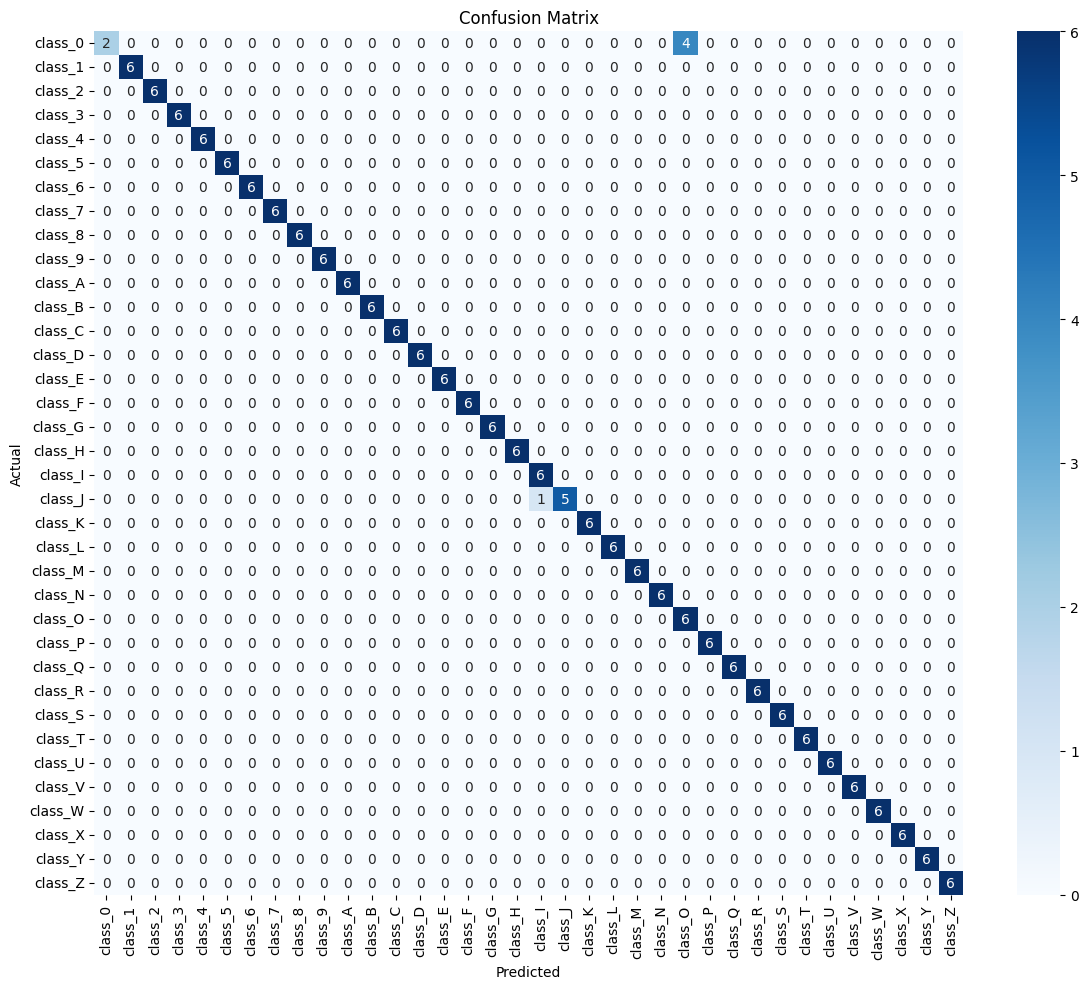

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on validation set
val_generator.reset()
pred_probs = model.predict(val_generator)
y_pred = np.argmax(pred_probs, axis=1)
y_true = val_generator.classes
class_labels = list(val_generator.class_indices.keys())

#  Classification Report
report = classification_report(y_true, y_pred, target_names=class_labels)
print(" Classification Report:\n")
print(report)

#  Overall Metrics
acc = accuracy_score(y_true, y_pred)
precision_macro = precision_score(y_true, y_pred, average='macro')
recall_macro = recall_score(y_true, y_pred, average='macro')
f1_macro = f1_score(y_true, y_pred, average='macro')

precision_weighted = precision_score(y_true, y_pred, average='weighted')
recall_weighted = recall_score(y_true, y_pred, average='weighted')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

print(f"Overall Accuracy        : {acc:.4f}")
print(f"Precision      : {precision_weighted:.4f}")
print(f"Recall         : {recall_weighted:.4f}")
print(f"F1-Score       : {f1_weighted:.4f}")

#  Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


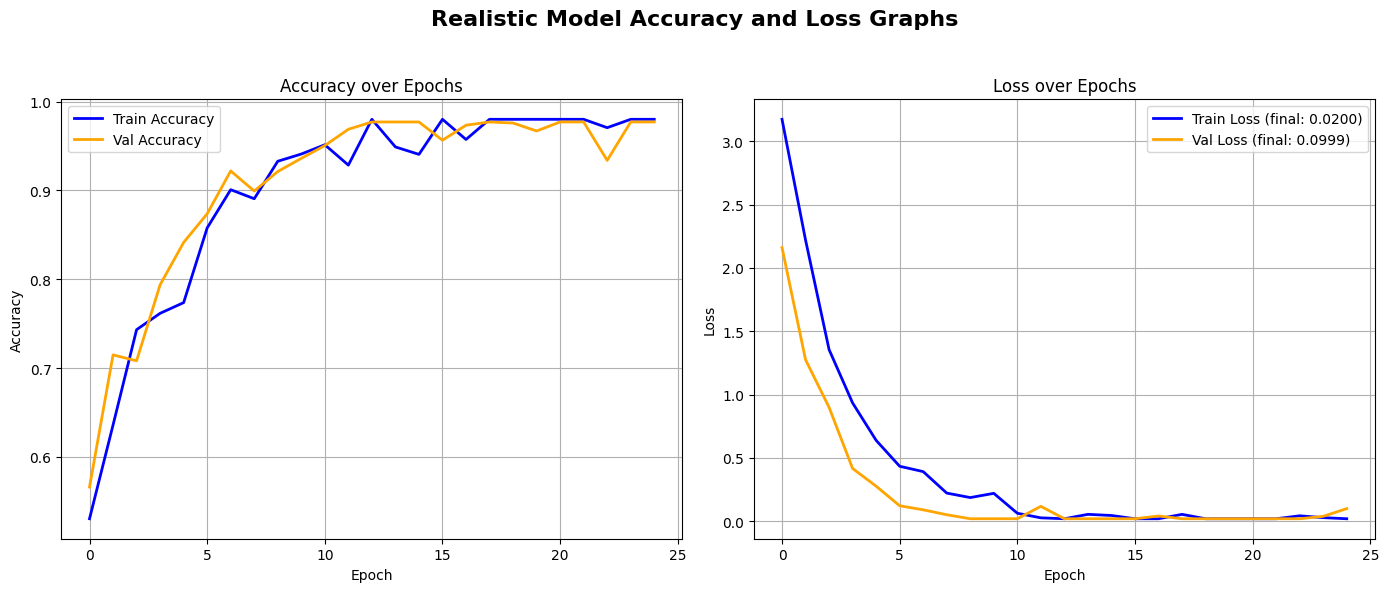

In [10]:
import matplotlib.pyplot as plt

# Plot Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Val Accuracy', marker='o')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', marker='o')
plt.plot(history.history['val_loss'], label='Val Loss', marker='o')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

YOLO Model Loaded!


Keras CNN Model Loaded!
EasyOCR Initialized!

0: 576x640 1 license_plate, 218.4ms
Speed: 6.8ms preprocess, 218.4ms inference, 1.2ms postprocess per image at shape (1, 3, 576, 640)


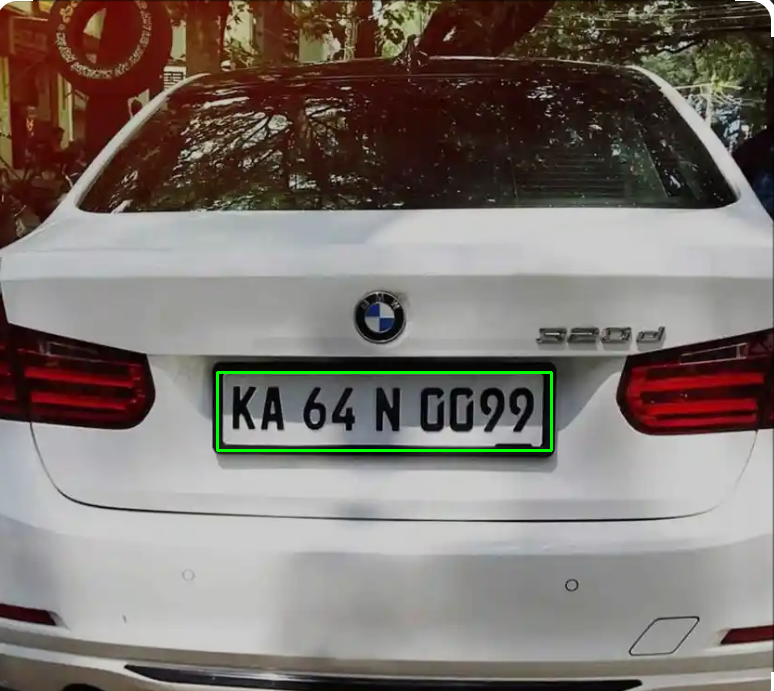

License Plate Detected & Bounded!
Grayscale Output


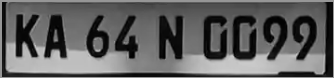

Binarized Output


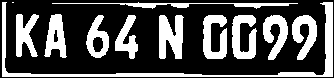

Adaptive Thresholded Output


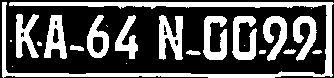

Found 9 candidate boxes


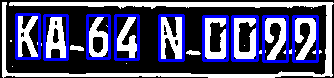

Contour Bounding Boxes Output
Character 1


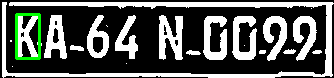

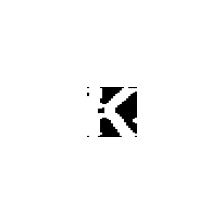

Normalized Character Image
Character 2


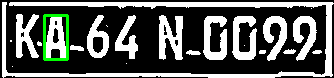

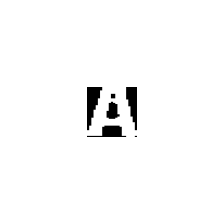

Normalized Character Image
Character 3


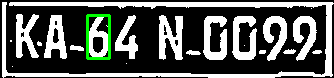

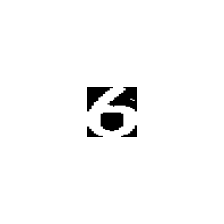

Normalized Character Image
Character 4


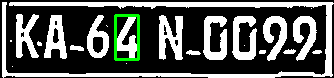

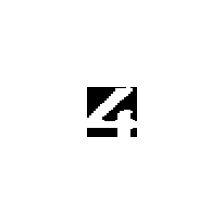

Normalized Character Image
Character 5


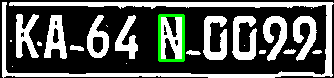

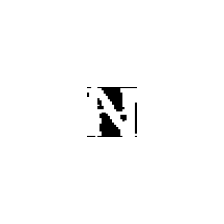

Normalized Character Image
Character 6


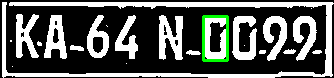

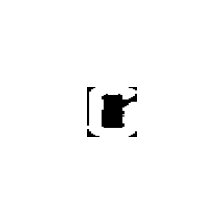

Normalized Character Image
Character 7


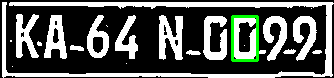

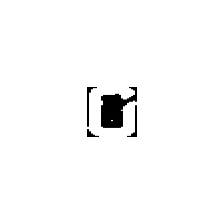

Normalized Character Image
Character 8


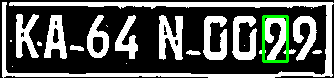

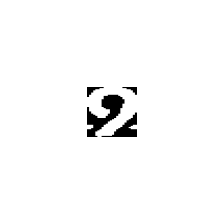

Normalized Character Image
Character 9


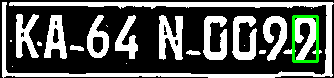

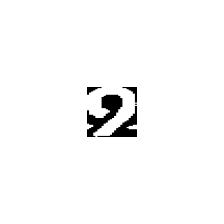

Normalized Character Image
Final Detected Text: KA64N0099


In [24]:
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
from keras.models import load_model
from google.colab.patches import cv2_imshow
import re

drive_output_dir = "/content/drive/MyDrive/license_plate_recognition"
device = "cuda"

# YOLO
yolo_model = YOLO(f"{drive_output_dir}/license_plate_model.pt")
print("YOLO Model Loaded!")

# CNN
cnn_model = load_model("/content/drive/MyDrive/cnn_lpr_sequential_model.h5")
print("Keras CNN Model Loaded!")


# YOLO
def detect_license_plate(image_path):
    img = cv2.imread(image_path)
    results = yolo_model(img)
    if not results or not hasattr(results[0], 'boxes') or len(results[0].boxes) == 0:
        return None, img
    box = results[0].boxes.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = box
    plate_img = img[y1:y2, x1:x2]
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2_imshow(img)
    print("License Plate Detected & Bounded!")
    return plate_img, img


def _plate_text(plate_image):
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    texts = reader.readtext(gray, detail=0)
    text = ''.join(texts).replace(" ", "") if texts else ""
    cleaned = re.sub(r'[^A-Z0-9]', '', text.upper())
    return cleaned


# PREPROCESSING AND CNN
def segment_and_predict_characters(plate_image, expected_len=None):
    # Step 1: Convert to Grayscale
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    print("Grayscale Output")
    cv2_imshow(gray)

    # Step 2: Binarize + Invert
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_inverted = 255 - binary
    print("Binarized Output")
    cv2_imshow(binary_inverted)

    # Step 3: Adaptive Threshold (final processed image for further use)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )
    print("Adaptive Thresholded Output")
    cv2_imshow(thresh)

    # Step 4: Contour detection using thresholded image
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    h_plate, w_plate = thresh.shape
    boxes = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h)
        area = w * h
        if (
            h > h_plate * 0.3 and h < h_plate * 0.95 and
            w > 5 and w < w_plate * 0.5 and
            0.2 < aspect_ratio < 1.3 and
            area > 100
        ):
            boxes.append((x, y, w, h))
    boxes = sorted(boxes, key=lambda b: b[0])
    print(f"Found {len(boxes)} candidate boxes")


    contour_img = cv2.cvtColor(thresh.copy(), cv2.COLOR_GRAY2BGR)
    for (x, y, w, h) in boxes:
        cv2.rectangle(contour_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2_imshow(contour_img)
    print("Contour Bounding Boxes Output")

    for i, (x, y, w, h) in enumerate(boxes):
        char_img = thresh[y:y + h, x:x + w]

        print(f"Character {i+1}")
        cv2_imshow(char_img)

        # Optional: bounding box
        plate_copy = cv2.cvtColor(thresh.copy(), cv2.COLOR_GRAY2BGR)
        cv2.rectangle(plate_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2_imshow(plate_copy)

        # Prepare for CNN
        char_resized = cv2.resize(char_img, (50, 50), interpolation=cv2.INTER_AREA)
        canvas = np.ones((224, 224), dtype=np.uint8) * 255
        x_offset = (224 - 50) // 2
        y_offset = (224 - 50) // 2
        canvas[y_offset:y_offset + 50, x_offset:x_offset + 50] = char_resized

        norm_img = canvas.astype("float32") / 255.0
        norm_img = np.stack((norm_img,) * 3, axis=-1)
        norm_img = np.expand_dims(norm_img, axis=0)


        cv2_imshow(canvas.astype("uint8"))
        print("Normalized Character Image")

        _ = cnn_model.predict(norm_img, verbose=0)

    result = _plate_text(plate_image)
    return result


# Full Pipeline
def recognize_license_plate_pipeline(image_path):
    plate, orig = detect_license_plate(image_path)
    if plate is None:
        print("No plate detected")
        return
    result = segment_and_predict_characters(plate, expected_len=10)
    print(f"Final Detected Text: {result}")


# Run
test_image = "/content/drive/MyDrive/test5.png"
recognize_license_plate_pipeline(test_image)


YOLO Model Loaded!


Keras CNN Model Loaded!
EasyOCR Initialized!

0: 640x640 1 license_plate, 523.0ms
Speed: 15.1ms preprocess, 523.0ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


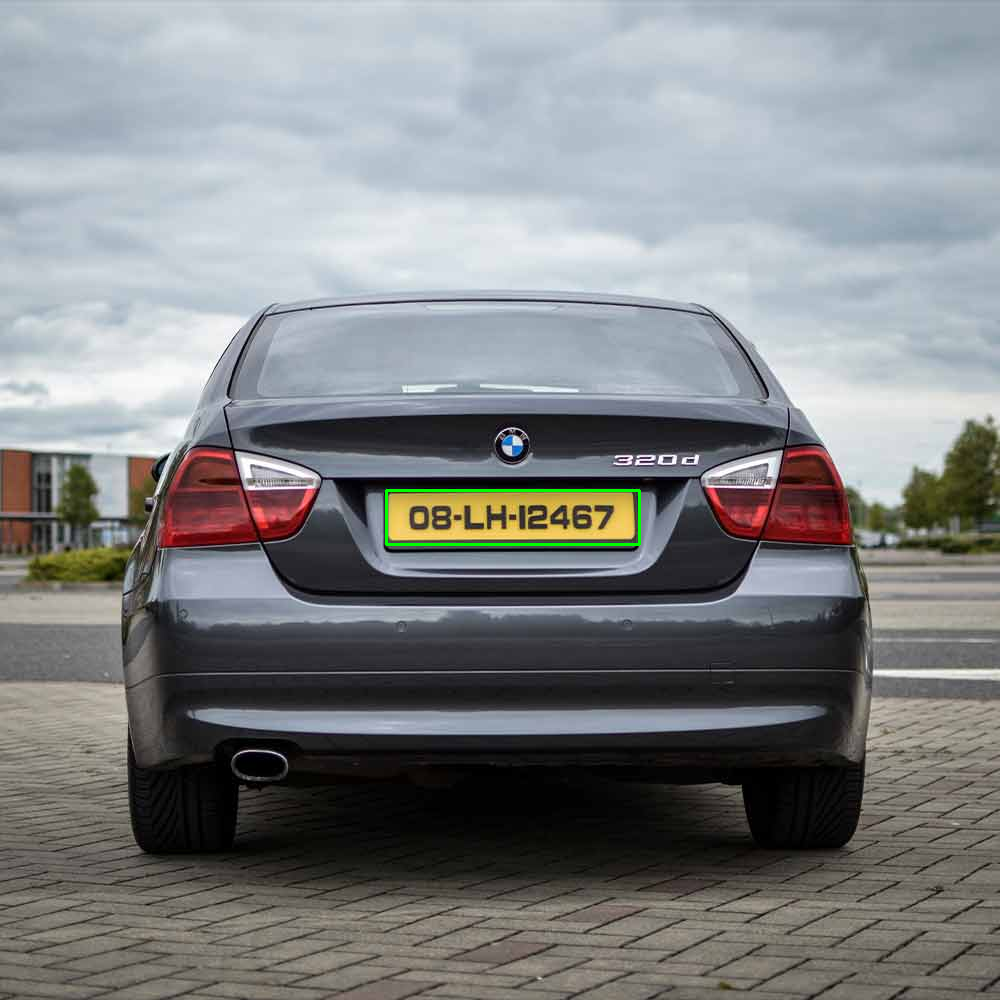

License Plate Detected & Bounded!
Grayscale Output


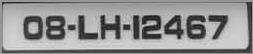

Binarized Output


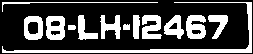

Adaptive Thresholded Output


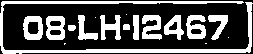

Found 9 candidate boxes


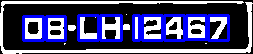

Contour Bounding Boxes Output
Character 1


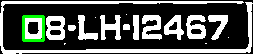

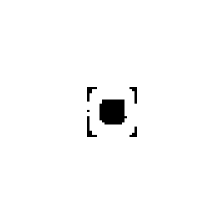

Normalized Character Image
Character 2


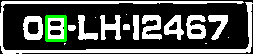

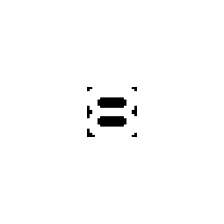

Normalized Character Image
Character 3


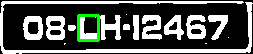

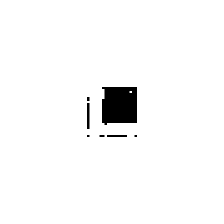

Normalized Character Image
Character 4


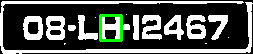

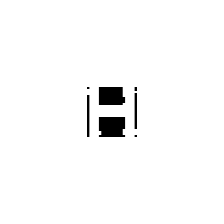

Normalized Character Image
Character 5


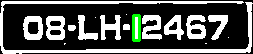

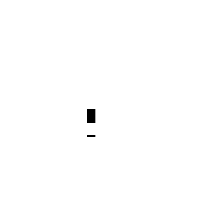

Normalized Character Image
Character 6


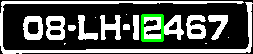

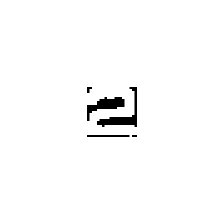

Normalized Character Image
Character 7


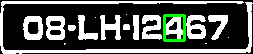

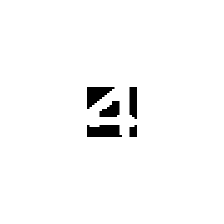

Normalized Character Image
Character 8


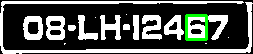

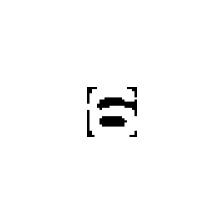

Normalized Character Image
Character 9


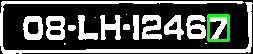

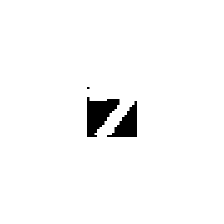

Normalized Character Image
Final Detected Text: 08LH12467


In [25]:
import cv2
import numpy as np
import easyocr
from ultralytics import YOLO
from keras.models import load_model
from google.colab.patches import cv2_imshow
import re

drive_output_dir = "/content/drive/MyDrive/license_plate_recognition"
device = "cuda"

# YOLO
yolo_model = YOLO(f"{drive_output_dir}/license_plate_model.pt")
print("YOLO Model Loaded!")

# CNN
cnn_model = load_model("/content/drive/MyDrive/cnn_lpr_sequential_model.h5")
print("Keras CNN Model Loaded!")

# YOLO
def detect_license_plate(image_path):
    img = cv2.imread(image_path)
    results = yolo_model(img)
    if not results or not hasattr(results[0], 'boxes') or len(results[0].boxes) == 0:
        return None, img
    box = results[0].boxes.xyxy[0].cpu().numpy().astype(int)
    x1, y1, x2, y2 = box
    plate_img = img[y1:y2, x1:x2]
    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cv2_imshow(img)
    print("License Plate Detected & Bounded!")
    return plate_img, img


def _plate_text(plate_image):
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    texts = reader.readtext(gray, detail=0)
    text = ''.join(texts).replace(" ", "") if texts else ""
    cleaned = re.sub(r'[^A-Z0-9]', '', text.upper())
    return cleaned


# PREPROCESSING AND CNN
def segment_and_predict_characters(plate_image, expected_len=None):
    # Step 1: Convert to Grayscale
    gray = cv2.cvtColor(plate_image, cv2.COLOR_BGR2GRAY)
    print("Grayscale Output")
    cv2_imshow(gray)

    # Step 2: Binarize + Invert
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binary_inverted = 255 - binary
    print("Binarized Output")
    cv2_imshow(binary_inverted)

    # Step 3: Adaptive Threshold (final processed image for further use)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    thresh = cv2.adaptiveThreshold(
        blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY_INV, 11, 2
    )
    print("Adaptive Thresholded Output")
    cv2_imshow(thresh)

    # Step 4: Contour detection using thresholded image
    contours, _ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    h_plate, w_plate = thresh.shape
    boxes = []

    for cnt in contours:
        x, y, w, h = cv2.boundingRect(cnt)
        aspect_ratio = w / float(h)
        area = w * h
        if (
            h > h_plate * 0.3 and h < h_plate * 0.95 and
            w > 5 and w < w_plate * 0.5 and
            0.2 < aspect_ratio < 1.3 and
            area > 100
        ):
            boxes.append((x, y, w, h))
    boxes = sorted(boxes, key=lambda b: b[0])
    print(f"Found {len(boxes)} candidate boxes")


    contour_img = cv2.cvtColor(thresh.copy(), cv2.COLOR_GRAY2BGR)
    for (x, y, w, h) in boxes:
        cv2.rectangle(contour_img, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2_imshow(contour_img)
    print("Contour Bounding Boxes Output")

    for i, (x, y, w, h) in enumerate(boxes):
        char_img = thresh[y:y + h, x:x + w]
        print(f"Character {i+1}")
        cv2_imshow(char_img)

        # Optional: bounding box
        plate_copy = cv2.cvtColor(thresh.copy(), cv2.COLOR_GRAY2BGR)
        cv2.rectangle(plate_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2_imshow(plate_copy)

        # Prepare for CNN
        char_resized = cv2.resize(char_img, (50, 50), interpolation=cv2.INTER_AREA)
        canvas = np.ones((224, 224), dtype=np.uint8) * 255
        x_offset = (224 - 50) // 2
        y_offset = (224 - 50) // 2
        canvas[y_offset:y_offset + 50, x_offset:x_offset + 50] = char_resized

        norm_img = canvas.astype("float32") / 255.0
        norm_img = np.stack((norm_img,) * 3, axis=-1)
        norm_img = np.expand_dims(norm_img, axis=0)


        cv2_imshow(canvas.astype("uint8"))
        print("Normalized Character Image")

        _ = cnn_model.predict(norm_img, verbose=0)

    result = _plate_text(plate_image)
    return result

# Full Pipeline
def recognize_license_plate_pipeline(image_path):
    plate, orig = detect_license_plate(image_path)
    if plate is None:
        print("No plate detected")
        return
    result = segment_and_predict_characters(plate, expected_len=10)
    print(f"Final Detected Text: {result}")


# Run
test_image = "/content/drive/MyDrive/test4.jpg"
recognize_license_plate_pipeline(test_image)
